<a href="https://colab.research.google.com/github/phj03011/ai-sec-2020/blob/master/cnn_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, AveragePooling2D
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy as scc

from keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def build_model(width, height, channel):
    model = Sequential()

    model.add(Conv2D(
      filters=16,
      kernel_size=(3,3),
      padding='same',
      activation='relu',
      input_shape=(width, height, channel)
    ))
    model.add(Conv2D(
      filters=16,
      kernel_size=(3,3),
      padding='same',
      activation='relu'
    ))
    model.add(MaxPooling2D(
        pool_size=(2,2),
        padding='same'
    ))

    model.add(Conv2D(
      filters=32,
      kernel_size=(3,3),
      padding='same',
      activation='relu'
    ))
    model.add(MaxPooling2D(
        pool_size=(2,2),
        padding='same'
    ))

    model.add(Conv2D(
      filters=64,
      kernel_size=(3,3),
      padding='same',
      activation='relu'
    ))
    model.add(MaxPooling2D(
        pool_size=(8,8),
        padding='same'
    ))

    model.add(Flatten())
    model.add(Dense(
        units=640,
        activation='relu'
    ))
    model.add(Dense(
        units=10,
        activation='softmax'
    ))

    opt = Adam(learning_rate=0.001)
    model.compile(
        optimizer=opt,
        loss=scc,
        metrics=['accuracy']
    )

    return model

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

model = build_model(x_train.shape[1], x_train.shape[2], x_train.shape[3])

hist = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=20,
    verbose=1,
    shuffle=True, validation_split=0.1
)

model.evaluate(x_test, y_test, verbose=1)

Epoch 1/20
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6622 - accuracy: 0.4007 - val_loss: 1.4519 - val_accuracy: 0.4670
Epoch 2/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.2977 - accuracy: 0.5363 - val_loss: 1.2027 - val_accuracy: 0.5684
Epoch 3/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.1613 - accuracy: 0.5903 - val_loss: 1.1559 - val_accuracy: 0.5930
Epoch 4/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.0590 - accuracy: 0.6247 - val_loss: 1.0757 - val_accuracy: 0.6226
Epoch 5/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.9889 - accuracy: 0.6519 - val_loss: 1.1117 - val_accuracy: 0.6144
Epoch 6/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.9375 - accuracy: 0.6698 - val_loss: 1.0058 - val_accuracy: 0.6492
Epoch 7/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.8878 - accuracy: 0.6883 - val_loss: 1.0106 - val_accuracy:

[1.0523109436035156, 0.678600013256073]

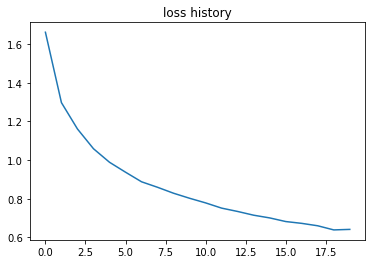

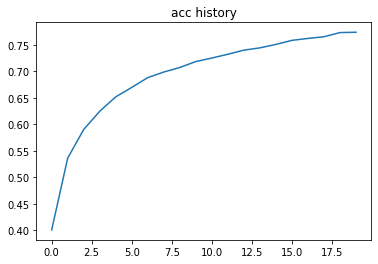

In [ ]:
plt.plot(hist.history['loss'])
plt.title("loss history")
plt.show()

plt.plot(hist.history['accuracy'])
plt.title("acc history")
plt.show()